In [161]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.dates as mdates
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [162]:
#create dataframe by reading file
stock_market = pd.read_csv('data/synthetic_stock_data.csv')
stock_market.head()

,Date,Company,Sector,Open,High,Low,Close,Volume,Market_Cap,PE_Ratio,Dividend_Yield,Volatility,Sentiment_Score,Trend
0,2022-01-01,Uber,Technology,100.000000,101.036120,97.477809,100.000000,171958,5.156585e+11,24.253218,0.163090,0.047484,0.939232,Bearish
1,2022-01-02,Tesla,Automotive,100.071106,102.037960,97.152675,100.071106,196867,9.755658e+11,18.602848,0.288515,0.022472,0.469417,Bearish
2,2022-01-03,Panasonic,Finance,99.857828,101.517497,98.108097,99.857828,181932,4.595300e+11,10.728933,2.221827,0.019991,0.399193,Bullish
3,2022-01-04,Tencent,Automotive,98.851663,101.303783,96.998218,98.851663,153694,5.577481e+11,14.582696,1.377740,0.036166,0.705853,Stable
4,2022-01-05,Wells Fargo,Automotive,98.391118,99.990486,96.230707,98.391118,169879,8.607714e+11,37.491114,3.110198,0.034770,-0.768354,Stable


In [163]:
stock_market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             1000 non-null   object 
 1   Company          1000 non-null   object 
 2   Sector           1000 non-null   object 
 3   Open             1000 non-null   float64
 4   High             1000 non-null   float64
 5   Low              1000 non-null   float64
 6   Close            1000 non-null   float64
 7   Volume           1000 non-null   int64  
 8   Market_Cap       1000 non-null   float64
 9   PE_Ratio         1000 non-null   float64
 10  Dividend_Yield   1000 non-null   float64
 11  Volatility       1000 non-null   float64
 12  Sentiment_Score  1000 non-null   float64
 13  Trend            1000 non-null   object 
dtypes: float64(9), int64(1), object(4)
memory usage: 109.5+ KB


In [164]:
stock_market.columns

Index(['Date', 'Company', 'Sector', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Market_Cap', 'PE_Ratio', 'Dividend_Yield', 'Volatility',
       'Sentiment_Score', 'Trend'],
      dtype='object')

In [165]:
stock_market['Company'].unique()

array(['Uber', 'Tesla', 'Panasonic', 'Tencent', 'Wells Fargo', 'Snapchat',
       'Adobe', 'Oracle', 'Novartis', 'Microsoft', 'Citigroup', 'HSBC',
       'Morgan Stanley', 'AstraZeneca', 'Moderna', 'Apple', 'Square',
       'Ferrari', 'PayPal', 'BP', 'Salesforce', 'Shell', 'Lamborghini',
       'Sony', 'Meta', 'Boeing', 'Lyft', 'IBM', 'Toyota', 'ExxonMobil',
       'Goldman Sachs', 'Intel', 'Chevron', 'Bank of America', 'LG',
       'AMD', 'Visa', 'Airbus', 'Mercedes-Benz', 'Nvidia', 'BMW',
       'SpaceX', 'Pfizer', 'Spotify', 'Netflix', 'TotalEnergies',
       'Samsung', 'Google', 'Roche', 'MasterCard', 'Ford',
       'Northrop Grumman', 'Amazon', 'General Motors', 'Alibaba',
       'Twitter', 'Lockheed Martin', 'Gilead Sciences', 'Porsche',
       'Johnson & Johnson', 'JPMorgan Chase', 'Raytheon', 'Honda'],
      dtype=object)

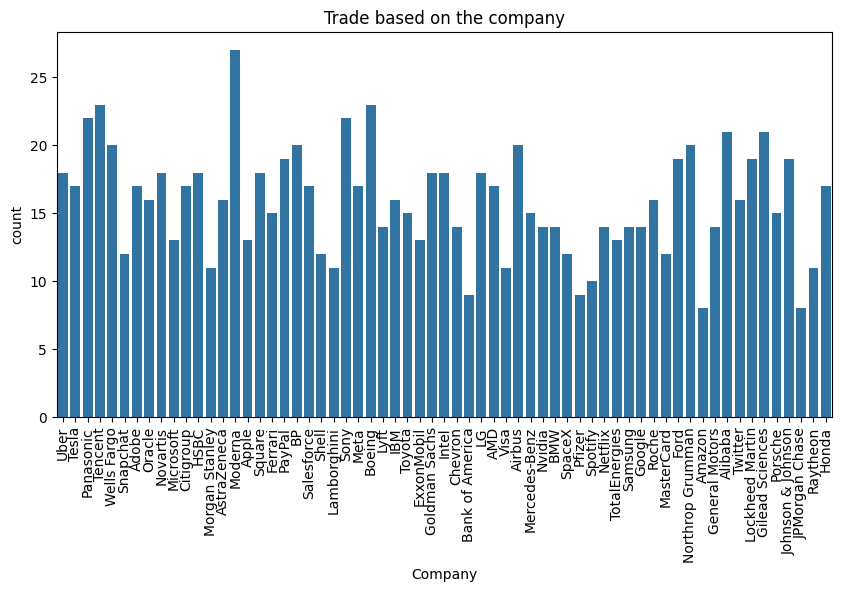

In [166]:
#plot trade based on the company
plt.figure(figsize=(10,5))
sns.countplot(x='Company',data=stock_market)
plt.title('Trade based on the company')
plt.xticks(rotation=90)
plt.show()

In [167]:
# 'Date' column is in datetime format
stock_market['Date'] = pd.to_datetime(stock_market['Date'])

In [168]:
# Now use .dt accessor
stock_market['dayofweek']=stock_market['Date'].dt.dayofweek
stock_market['day'] =stock_market['Date'].dt.day
stock_market['month']=stock_market['Date'].dt.month
stock_market['year']=stock_market['Date'].dt.year
stock_market['quarter']=stock_market['Date'].dt.quarter
stock_market['sin_day']=np.sin(stock_market['dayofweek'])
stock_market['cos_day']=np.cos(stock_market['dayofweek'])

stock_market.head(5)

,Date,Company,Sector,Open,High,Low,Close,Volume,Market_Cap,PE_Ratio,...,Volatility,Sentiment_Score,Trend,dayofweek,day,month,year,quarter,sin_day,cos_day
0,2022-01-01,Uber,Technology,100.000000,101.036120,97.477809,100.000000,171958,5.156585e+11,24.253218,...,0.047484,0.939232,Bearish,5,1,1,2022,1,-0.958924,0.283662
1,2022-01-02,Tesla,Automotive,100.071106,102.037960,97.152675,100.071106,196867,9.755658e+11,18.602848,...,0.022472,0.469417,Bearish,6,2,1,2022,1,-0.279415,0.960170
2,2022-01-03,Panasonic,Finance,99.857828,101.517497,98.108097,99.857828,181932,4.595300e+11,10.728933,...,0.019991,0.399193,Bullish,0,3,1,2022,1,0.000000,1.000000
3,2022-01-04,Tencent,Automotive,98.851663,101.303783,96.998218,98.851663,153694,5.577481e+11,14.582696,...,0.036166,0.705853,Stable,1,4,1,2022,1,0.841471,0.540302
4,2022-01-05,Wells Fargo,Automotive,98.391118,99.990486,96.230707,98.391118,169879,8.607714e+11,37.491114,...,0.034770,-0.768354,Stable,2,5,1,2022,1,0.909297,-0.416147


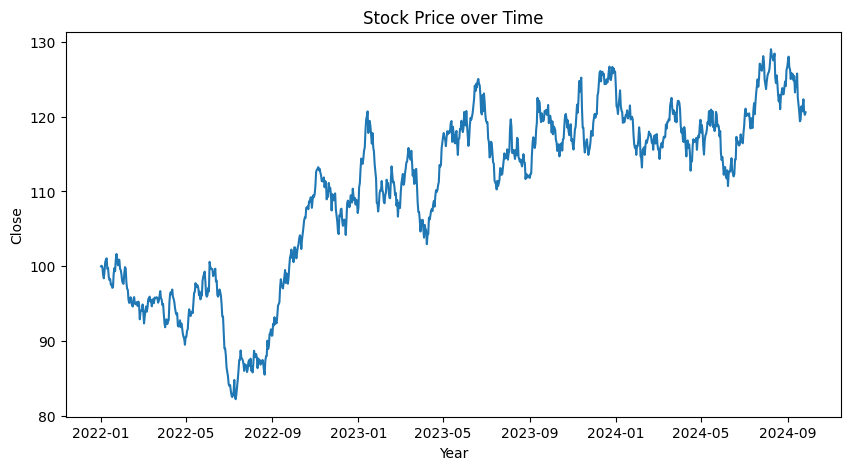

In [169]:
#plot graph on the closing
fig = plt.figure(figsize=(10,5))
plt.xlabel('Year')
plt.ylabel('Close')
plt.plot(stock_market['Date'], stock_market['Close'])
plt.title('Stock Price over Time')
plt.show()

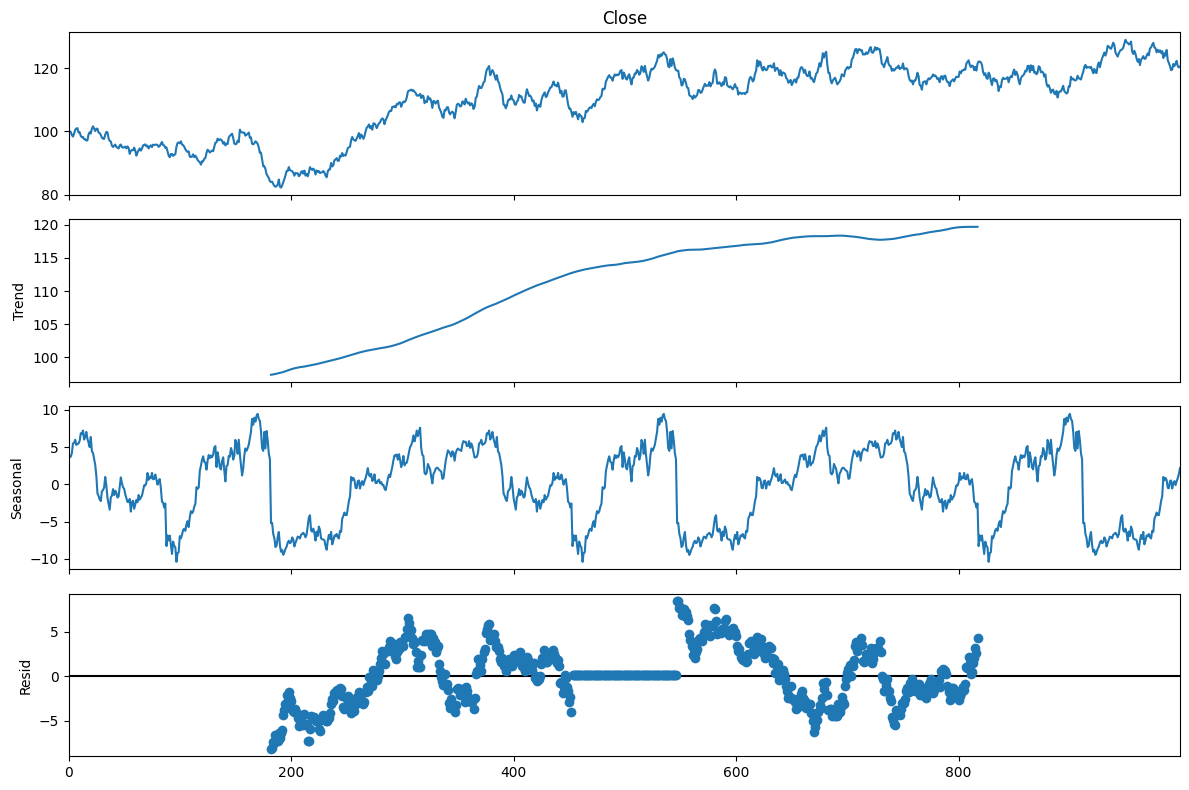

In [186]:
# Decompose the Close column
tsa_seasonal_close=stock_market['Close']
df_stock_d= stock_market[['year','Close']]

df_stock_d = df_stock_d.set_index('year')
df_stock_d.index = pd.PeriodIndex(df_stock_d.index, freq='A')

# Seasonal decomposition on the Close column
decomposition = seasonal_decompose(stock_market['Close'] ,model='additive', period=365)
decomposition.plot()
plt.show()

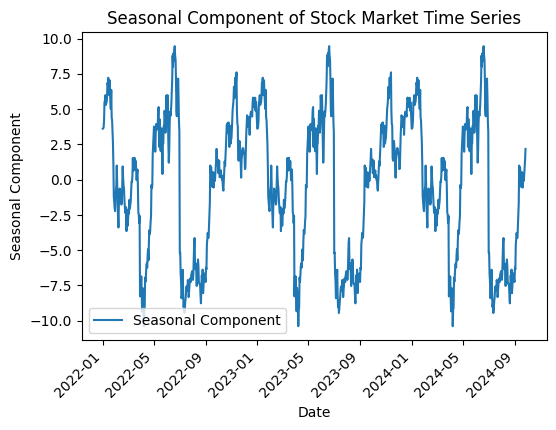

In [188]:
# Plot the seasonal component
plt.figure(figsize=(6, 4))
plt.plot(stock_market['Date'],decomposition.seasonal, label='Seasonal Component')
plt.title('Seasonal Component of Stock Market Time Series')
plt.xlabel('Date')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Seasonal Component')
plt.legend()
plt.show()

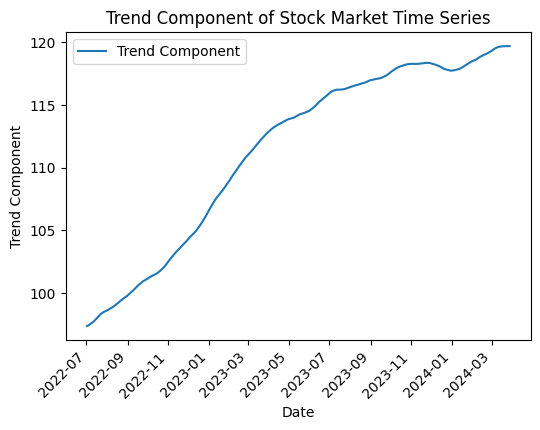

In [189]:
# Plot the Trend component
plt.figure(figsize=(6, 4))
plt.plot(stock_market['Date'],decomposition.trend, label='Trend Component')
plt.title('Trend Component of Stock Market Time Series')
plt.xlabel('Date')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Trend Component')
plt.legend()
plt.show()

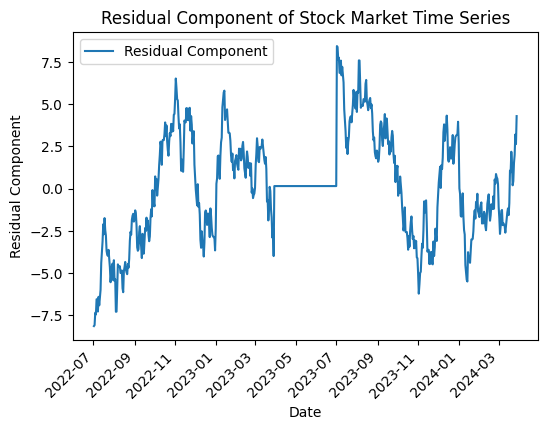

In [190]:
# Plot the Residual component
plt.figure(figsize=(6, 4))
plt.plot(stock_market['Date'],decomposition.resid, label='Residual Component')
plt.title('Residual Component of Stock Market Time Series')
plt.xlabel('Date')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Residual Component')
plt.legend()
plt.show()

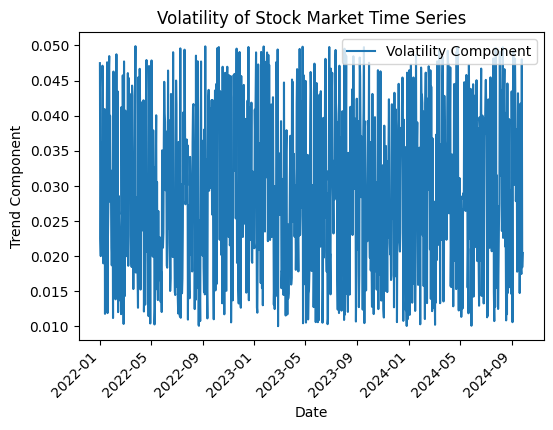

In [192]:
# Plot the Volatility component
plt.figure(figsize=(6, 4))
plt.plot(stock_market['Date'], stock_market['Volatility'],label='Volatility Component')
plt.title('Volatility of Stock Market Time Series')
plt.ylabel('Trend Component')
plt.xlabel('Date')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

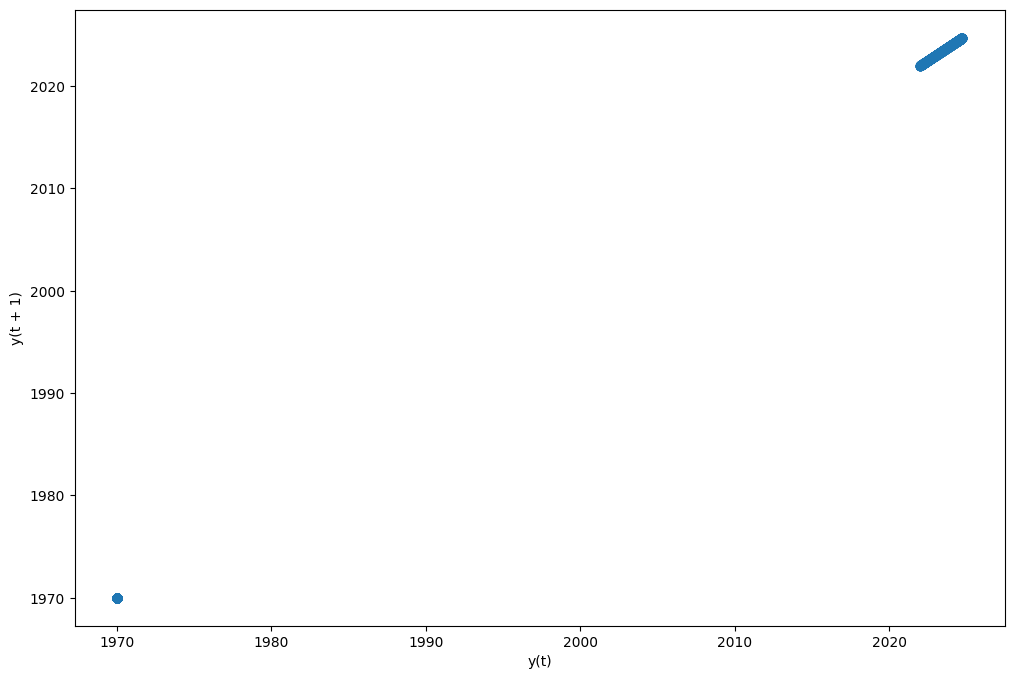

In [194]:
#Plot lag plot on the data
df_stock_lag= stock_market[['Date','Open', 'High', 'Low', 'Close', 'Volume']]
lag_plot(df_stock_lag)


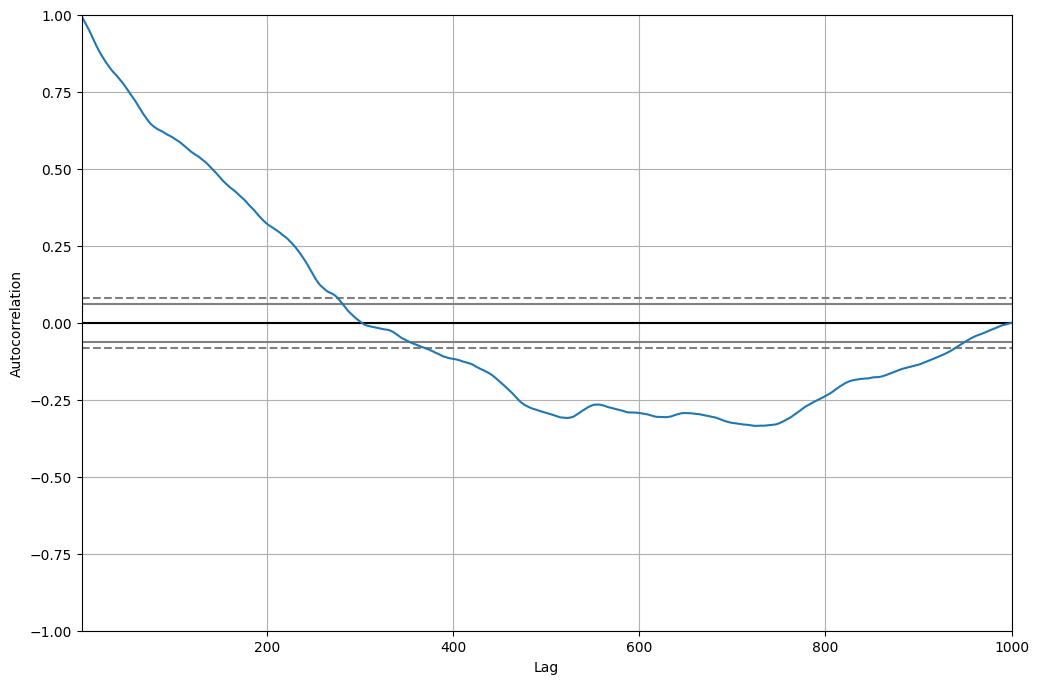

In [195]:
#Auto correlation of the close column
autocorrelation_plot(stock_market['Close'])
plt.show()

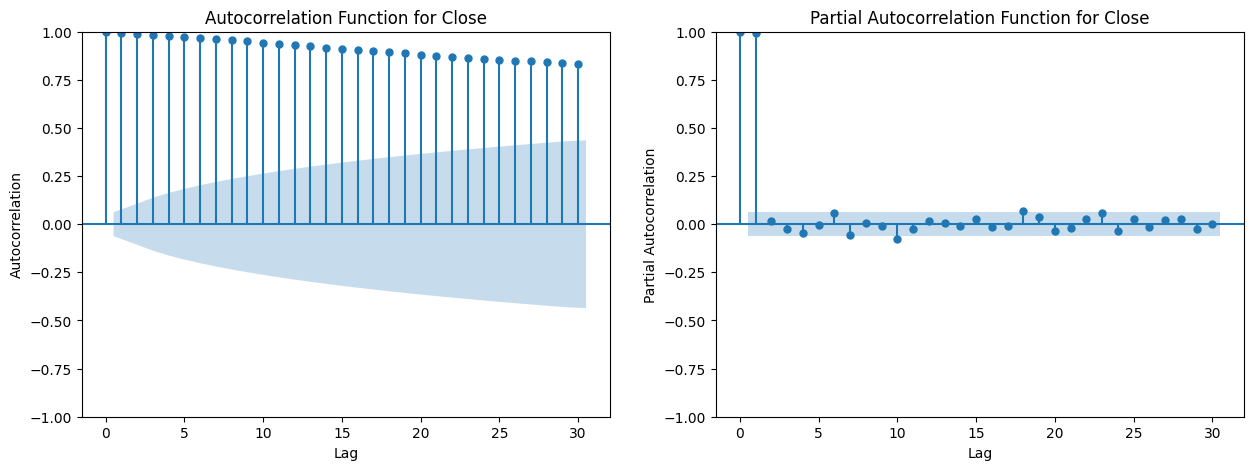

In [196]:
fig, (ax, ax1) = plt.subplots(1, 2, figsize=(15, 5))
plot_acf(stock_market['Close'], lags=30, ax=ax)
ax.set_title('Autocorrelation Function for Close')
ax.set_xlabel('Lag')
ax.set_ylabel('Autocorrelation')
plot_pacf(stock_market['Close'], lags=30, ax=ax1)
ax1.set_title('Partial Autocorrelation Function for Close')
ax1.set_xlabel('Lag')
ax1.set_ylabel('Partial Autocorrelation')
plt.show()

The series is likely non-stationary due to the slow decay of autocorrelations.There's no clear seasonality visible in this ACF plot.

There are no obvious cyclical or seasonal patterns visible in the PACF plot.

This PACF plot suggests that a simple model like ARIMA(1,d,q) might be suitable. Might also try ARIMA(1,d,1)

The rapid decay in partial autocorrelations after lag 1 is a good sign, but doesn't guarantee stationarity. You should still perform formal stationarity tests.

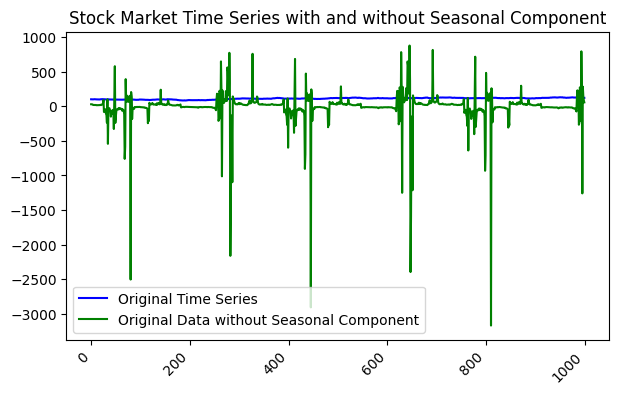

In [203]:
# Plotting the original data and original data without the seasonal component
plt.figure(figsize=(7, 4))

# Plot the original time series data
plt.plot(tsa_seasonal_close, label='Original Time Series', color='blue')
data_without_seasonal = tsa_seasonal_close / decomposition.seasonal

# Plot the original data without the seasonal component
plt.plot(data_without_seasonal,
         label='Original Data without Seasonal Component', color='green')
plt.title('Stock Market Time Series with and without Seasonal Component')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

In [204]:
stock_market['year'].value_counts()

,count
year,
2022,365
2023,365
2024,270


In [205]:
#Drop Date column
stock_market = stock_market.drop(['Date'],axis=1)

In [155]:
#prepare train data
df_train =stock_market[stock_market['year']<2024]
X_train = df_train.drop(['Close'],axis=1)
y_train = df_train['Close']


In [156]:
#prepare test data
dt_test = stock_market[stock_market['year']>=2024]
X_test = dt_test.drop(['Close'],axis=1)
y_test = dt_test['Close']

In [157]:
print(f'Length of train data :{len(df_train)}' )
print(f'Length of test data :{len(dt_test)}' )

Length of train data :730
Length of test data :270
